In [1]:
%load_ext autoreload
%autoreload 2

In [60]:
from polire.random.random import Random
from polire.trend.trend import Trend
from polire.spline.bspline import BSpline
from polire.xgboost.xgboost import XGB
from polire.rf.rf import RForest
from polire.spatial.spatial import SpatialAverage
from polire.gp.gp import GaussianProcess
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
import seaborn as sns
import sys

In [61]:
df = pd.read_csv("../../daily_44201_2018.csv")

In [62]:
df.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,30,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12


In [63]:
some_value = 'Ozone'
df = df.loc[df['Parameter Name'] == some_value]

some_value = '2018-05-07'
df = df.loc[df['Date Local'] == some_value]

df = df.sample(frac=1)
df.shape

(1240, 29)

In [64]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
163393,19,147,1002,44201,1,43.123704,-94.693518,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,71,NaN,-,"EMMETSBURG, IOWA LAKES COMMUNITY COLL.",IOWA LAKES COMMUNITY COLLEGE,Iowa,Palo Alto,Emmetsburg,NaN,2018-11-08
309992,42,43,401,44201,1,40.246992,-76.846988,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,44,NaN,-,A420430401LAT/LON POINT IS AT CORNER OF TRAILER,"651 Gibson Blvd., Harrisburg, PA 17104",Pennsylvania,Dauphin,Not in a city,"Harrisburg-Carlisle, PA",2019-04-10
349090,48,201,1015,44201,1,29.758889,-95.079444,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,143,NaN,-,Lynchburg Ferry,4364 Independence Parkway South,Texas,Harris,Baytown,"Houston-The Woodlands-Sugar Land, TX",2019-03-28
306876,42,11,11,44201,1,40.383350,-75.968600,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,51,NaN,-,Reading Airport,1059 Arnold Road,Pennsylvania,Berks,Not in a city,"Reading, PA",2019-04-10
335685,47,165,7,44201,1,36.297560,-86.653137,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,6,NaN,-,Hendersonville Ozone Site at Old Hickory Dam,ROCKLAND RECREATION AREA-OLD HICKORY DAM Army ...,Tennessee,Sumner,Hendersonville,"Nashville-Davidson--Murfreesboro--Franklin, TN",2019-05-28


In [65]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [66]:
r = Random(resolution='standard')
trainX = df_train[['Longitude', 'Latitude']].values
trainy = df_train['Arithmetic Mean'].values
r.fit(trainX, trainy)

Random

In [67]:
testX = df_test[['Longitude', 'Latitude']].values
testy = df_test['Arithmetic Mean'].values

In [68]:
x1max, x2max = np.max(trainX, axis=0)
print (x1max, x2max)
x1min, x2min = np.min(trainX, axis=0)

-66.126531 64.84568999999999


In [69]:
x1min, x1max, x2min, x2max

(-158.08861299999998, -66.126531, 18.440774, 64.84568999999999)

In [70]:
lss = [
    Random(),
    SpatialAverage(),
    BSpline(kx=2, ky=2),
    Trend(order=2),
    GaussianProcess(),
    XGB(),
    RForest(),
]

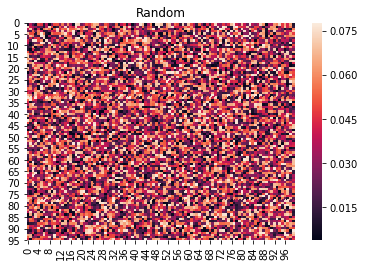

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/polire-0.1.0-py3.6.egg/polire/spatial/spatial.py:55: RuntimeWarning: invalid value encountered in long_scalars
  points_within_rad = mask.sum()


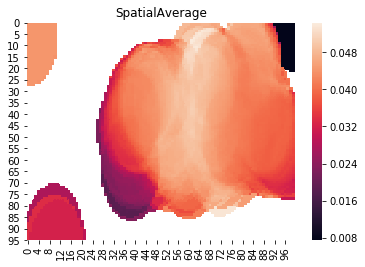

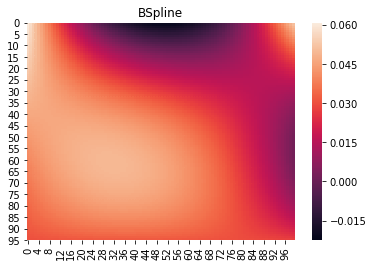

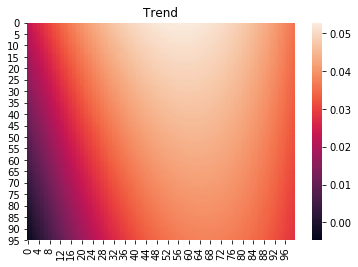

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.81739378]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 120, 'nit': 7, 'warnflag': 2}
  ConvergenceWarning)


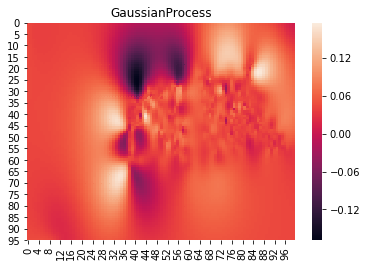

[09:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


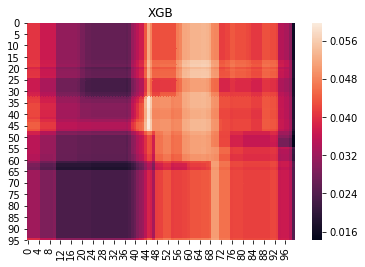

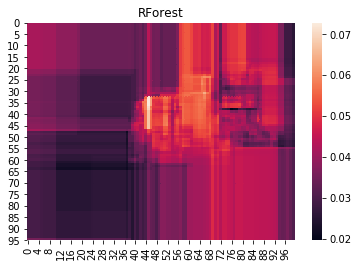

In [85]:
for r in lss:
    r.fit(trainX, trainy)
#     try:""
    Z = r.predict_grid((x1min, x1max), (x2min, x2max)).reshape(100, 100)
#     print (Z)
    sns.heatmap(Z)
    plt.title(r)
    plt.show()
    plt.close()
#     except:
#         print (f"Was not able to. for {r.__class__}!")


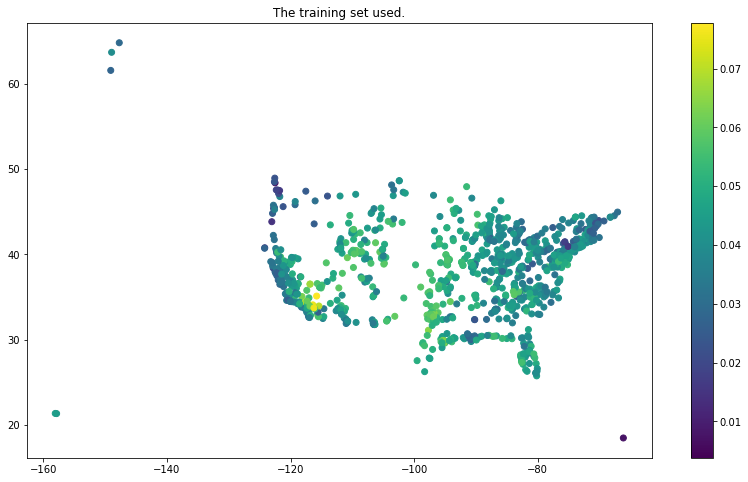

In [86]:
plt.figure(figsize=(14, 8))
h = plt.scatter(trainX[:, 0], trainX[:, 1], c = trainy)
plt.title("The training set used.")
plt.colorbar(h)

In [87]:
outputs = []

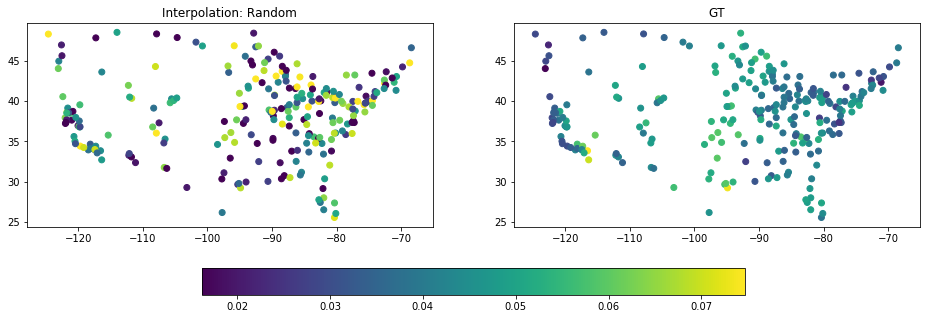

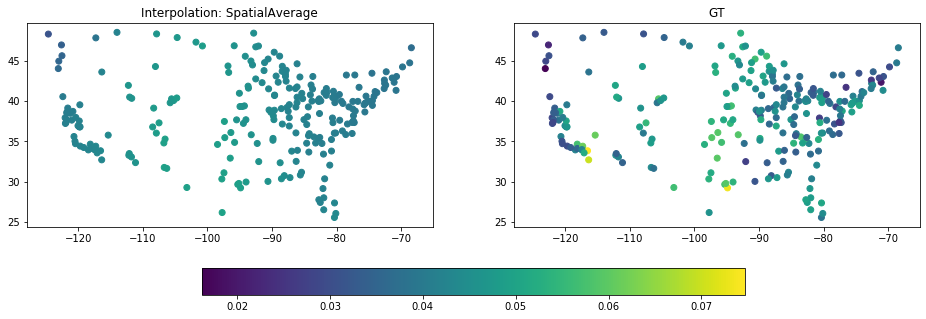

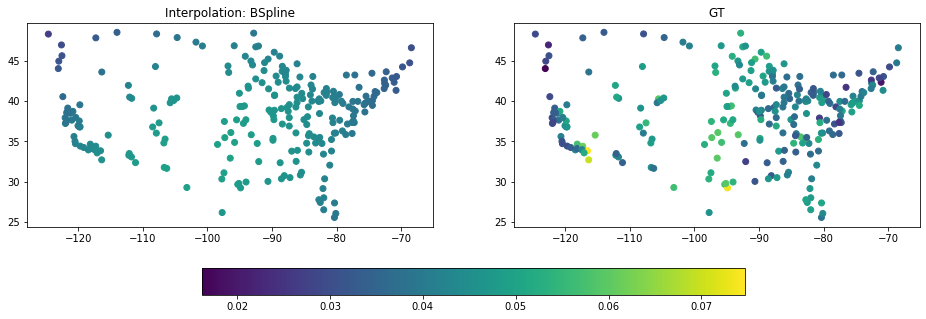

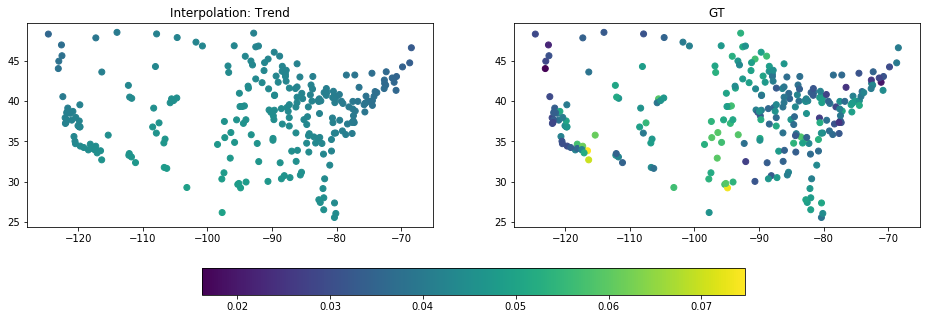

/home/apoorv/Desktop/github/polire/.env/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.81739378]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 120, 'nit': 7, 'warnflag': 2}
  ConvergenceWarning)


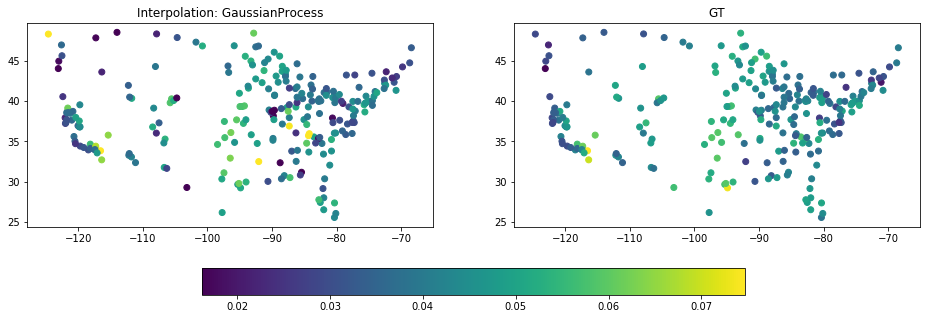

[09:44:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


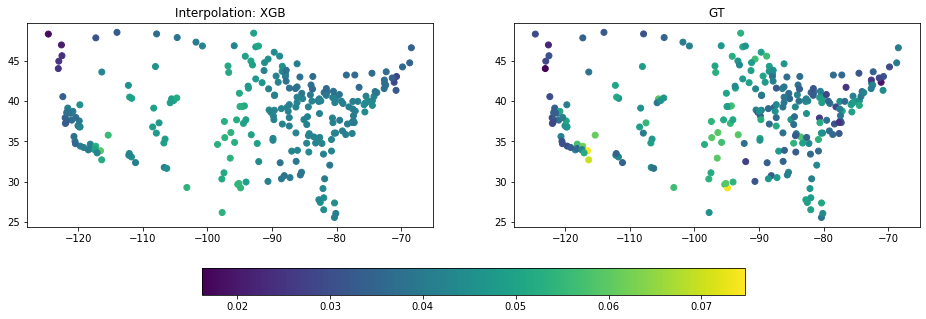

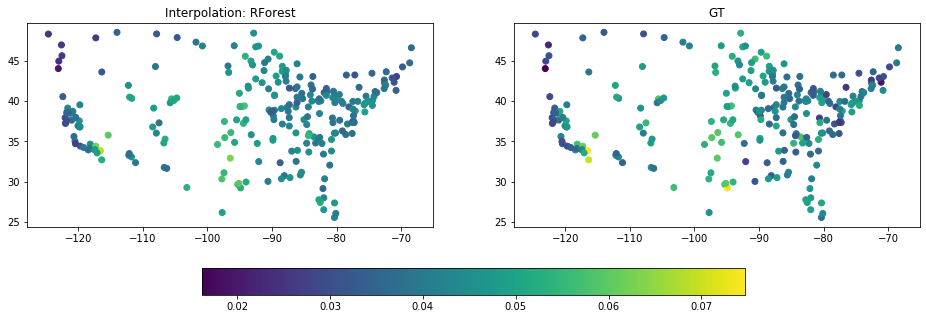

In [88]:
for r in lss:
    r.fit(trainX, trainy)
    try:
        fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(16, 5))
        pred_y = r.predict(testX)
        outputs.append(pred_y)
        vmin = min(testy)
        vmax = max(testy)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        inter = ax[0].scatter(testX[:, 0], testX[:, 1], c = pred_y)
        ax[0].set_title(f"Interpolation: {r}")
        gt = ax[1].scatter(testX[:, 0], testX[:, 1], c = testy)
        
        # normalize colorbar
        inter.set_norm(norm)
        gt.set_norm(norm)
        fig.colorbar(gt, ax=ax, orientation='horizontal', fraction=.1)
        
        ax[1].set_title("GT")
        plt.show()
        
    except NotImplementedError as e:
        print (f"Was not able to. for {r}!")
        print(str(e))

In [89]:
from sklearn.metrics import (
    r2_score, mean_absolute_error, 
    mean_squared_error
)

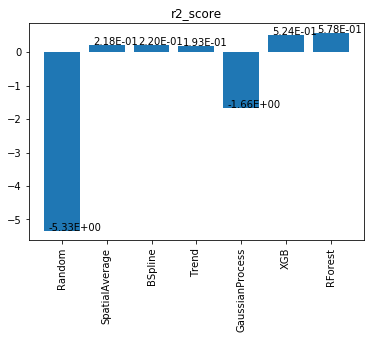

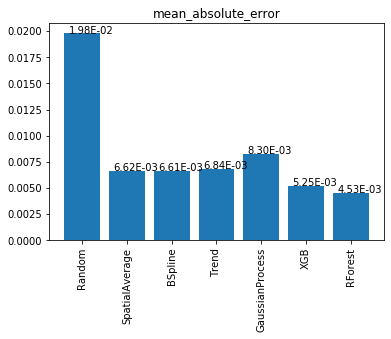

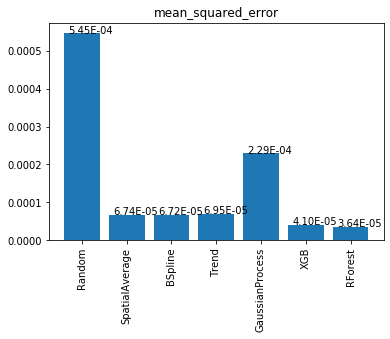

In [90]:
metrics = [
    r2_score,
    mean_absolute_error, 
    mean_squared_error
]

temp2 = range(len(lss))
for metric in metrics:
    metric_vals = [metric(testy, output) for output in outputs]
    plt.bar(temp2, metric_vals)
    plt.xticks(temp2, [l for l in lss], rotation='vertical')
    plt.title(metric.__name__)
    for i, metric_val in enumerate(metric_vals):
        plt.text(i-0.3, metric_val, "%.2E" % metric_val)
    plt.show()
    

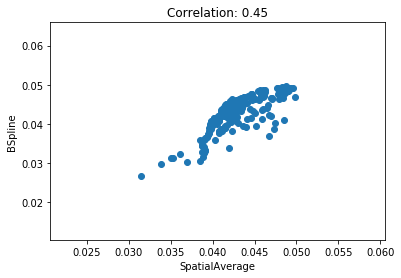

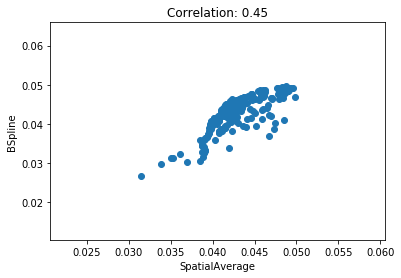

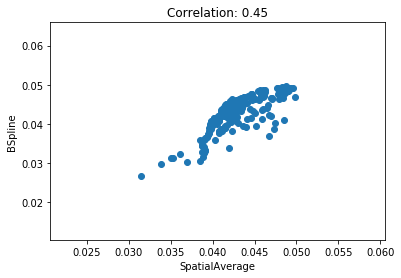

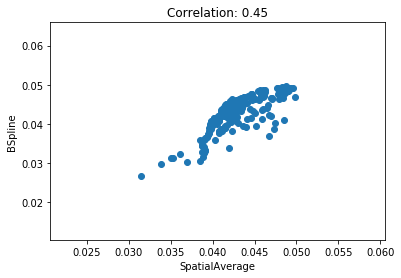

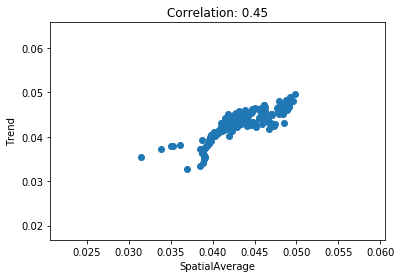

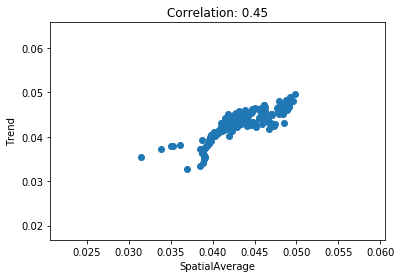

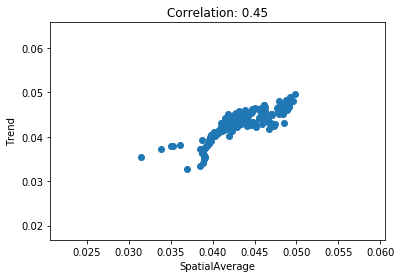

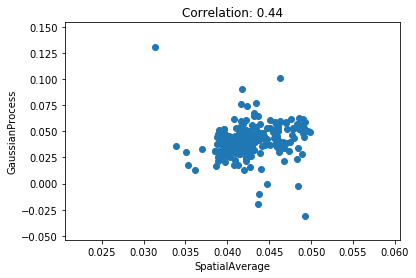

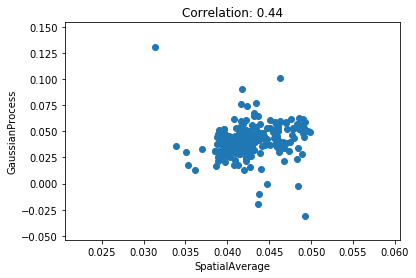

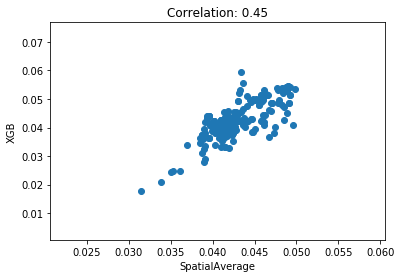

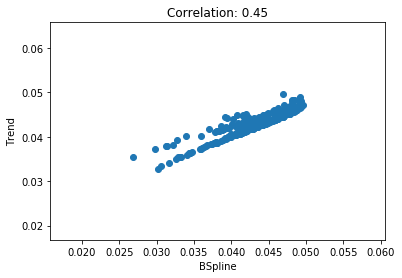

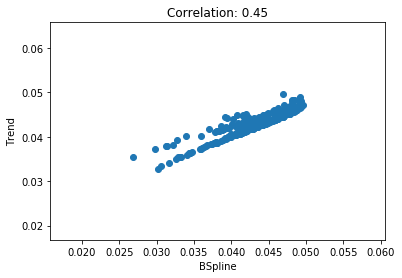

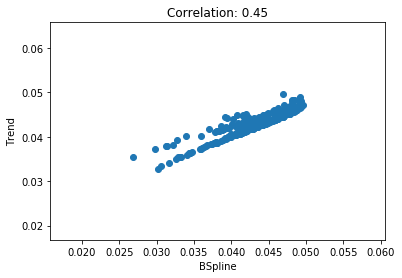

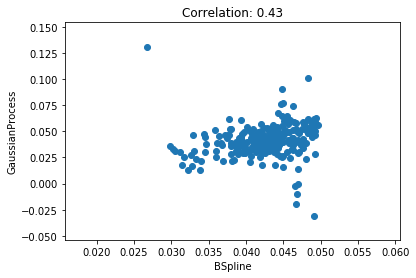

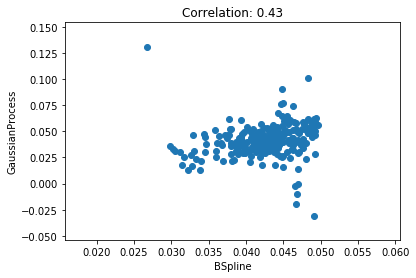

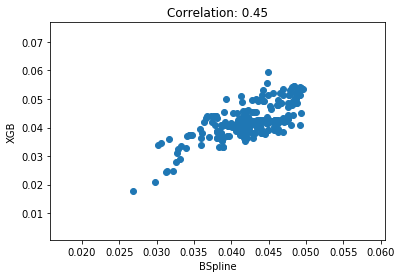

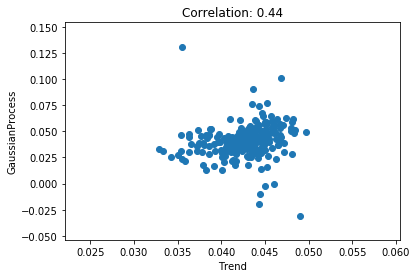

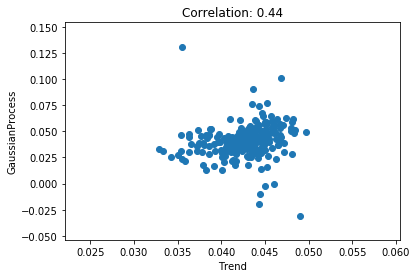

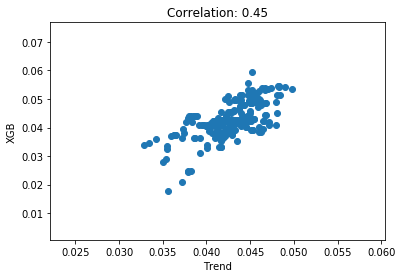

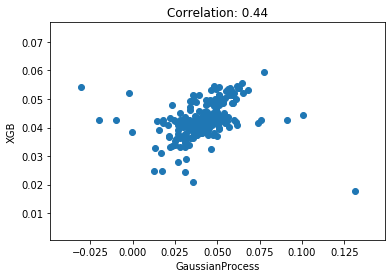

In [91]:
import itertools
for comb in itertools.combinations(
    list(zip(range(len(lss)), outputs)), 
    3):
    ix0 = comb[0][0]
    ix1 = comb[1][0]
    if ix0 == 0 or ix1 == 0:
        continue # we don't care about random
    plt.scatter(outputs[ix0], outputs[ix1])
    plt.xlabel(lss[ix0])
    plt.ylabel(lss[ix1])
    corr = np.correlate(comb[0][1], comb[1][1]).item()
    plt.title('Correlation: %1.2f' % corr)
    plt.show()


In [92]:
r.predict

<bound method Base.predict of RForest>

In [93]:
lims = 1, 3, 3, 5
resolution = 12
x1min, x1max, x2min, x2max = lims
x1 = np.linspace(x1min, x1max, resolution)
x2 = np.linspace(x2min, x2max, resolution)
X1, X2 = np.meshgrid(x1, x2)